<a href="https://colab.research.google.com/github/Nemit-jindal/ML_Decision_Tree/blob/main/Decision_Tree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import fetch_california_housing
data=fetch_california_housing()
df=pd.DataFrame(data.data,columns=data.feature_names)

In [4]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
df['Price']=data.target

In [6]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [9]:
df=df.sample(frac=0.20)

In [10]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9060,4.5455,25.0,5.511327,1.106796,775.0,2.508091,34.68,-118.14
3644,2.8710,31.0,3.552677,1.037997,2397.0,4.139896,34.22,-118.46
19582,2.0385,25.0,5.021875,1.065625,2319.0,3.623438,37.65,-120.76
16402,6.0582,39.0,4.536082,0.855670,270.0,2.783505,37.97,-121.20
8530,3.4698,31.0,5.390244,1.198606,956.0,3.331010,33.90,-118.35
...,...,...,...,...,...,...,...,...
3410,4.4375,24.0,5.335423,1.055381,2310.0,2.413793,34.26,-118.32
4223,3.5750,50.0,4.884892,1.055156,1089.0,2.611511,34.12,-118.27
19662,1.7227,52.0,4.954023,1.011494,922.0,2.649425,37.50,-120.85
8611,5.5430,34.0,6.175497,1.142384,963.0,3.188742,33.86,-118.36


In [12]:
y

,Price
9060,1.265
3644,1.844
19582,0.843
16402,1.577
8530,2.250
...,...
3410,1.915
4223,2.306
19662,0.857
8611,3.059


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [14]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model

DecisionTreeRegressor()

In [15]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [17]:
y_pred=model.predict(x_test)

In [18]:
y_pred

array([0.483  , 1.726  , 1.506  , 4.359  , 2.56   , 2.784  , 1.464  ,
       1.574  , 2.734  , 2.333  , 4.699  , 2.62   , 3.011  , 1.571  ,
       1.832  , 4.227  , 2.324  , 0.992  , 1.542  , 0.656  , 0.628  ,
       2.3    , 0.595  , 4.518  , 2.813  , 1.299  , 5.00001, 2.609  ,
       2.26   , 3.677  , 1.574  , 2.356  , 1.011  , 1.544  , 2.312  ,
       2.147  , 1.44   , 1.1    , 0.822  , 3.671  , 0.81   , 0.515  ,
       1.849  , 1.51   , 2.175  , 3.71   , 2.126  , 0.906  , 2.708  ,
       2.028  , 2.435  , 2.441  , 0.872  , 1.733  , 1.644  , 1.469  ,
       0.969  , 2.178  , 2.882  , 1.175  , 3.871  , 1.463  , 1.837  ,
       2.784  , 1.814  , 1.62   , 1.553  , 1.463  , 4.676  , 1.865  ,
       1.678  , 1.589  , 1.84   , 1.1    , 1.779  , 3.963  , 4.227  ,
       1.581  , 3.257  , 0.488  , 5.00001, 0.958  , 1.832  , 2.147  ,
       1.298  , 2.759  , 1.194  , 3.346  , 0.544  , 2.765  , 2.147  ,
       1.103  , 5.00001, 0.579  , 1.614  , 1.298  , 2.312  , 1.39   ,
       2.44   , 0.71

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4406849267867816

In [20]:
parameter={
    'criterion':['squared_error','poissor'],
    'max_depth':[1,2,3,4,6,8],
    'splitter':['best','random'],
    'max_features':['sqrt','log2']
}
reg=DecisionTreeRegressor()

In [21]:
from sklearn.model_selection import GridSearchCV
model=GridSearchCV(reg,param_grid=parameter,cv=5,scoring="neg_mean_squared_error")

In [22]:
model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'poissor'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [23]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'poissor'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [24]:
model.best_params_

{'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'best'}

In [25]:
final_model=DecisionTreeRegressor(criterion="squared_error",max_depth=8)

In [26]:
final_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8)

[Text(0.553343023255814, 0.9444444444444444, 'x[0] <= 5.647\nsquared_error = 1.386\nsamples = 578\nvalue = 2.092'),
 Text(0.2880813953488372, 0.8333333333333334, 'x[0] <= 3.05\nsquared_error = 0.883\nsamples = 501\nvalue = 1.818'),
 Text(0.11453488372093024, 0.7222222222222222, 'x[6] <= 34.55\nsquared_error = 0.56\nsamples = 204\nvalue = 1.315'),
 Text(0.03837209302325582, 0.6111111111111112, 'x[4] <= 75.5\nsquared_error = 0.727\nsamples = 95\nvalue = 1.644'),
 Text(0.03372093023255814, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 5.0'),
 Text(0.04302325581395349, 0.5, 'x[7] <= -117.515\nsquared_error = 0.613\nsamples = 94\nvalue = 1.608'),
 Text(0.020930232558139535, 0.3888888888888889, 'x[6] <= 33.71\nsquared_error = 0.613\nsamples = 69\nvalue = 1.81'),
 Text(0.009302325581395349, 0.2777777777777778, 'x[5] <= 2.307\nsquared_error = 0.563\nsamples = 2\nvalue = 4.25'),
 Text(0.004651162790697674, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 5.0'),
 Text(0.01395348

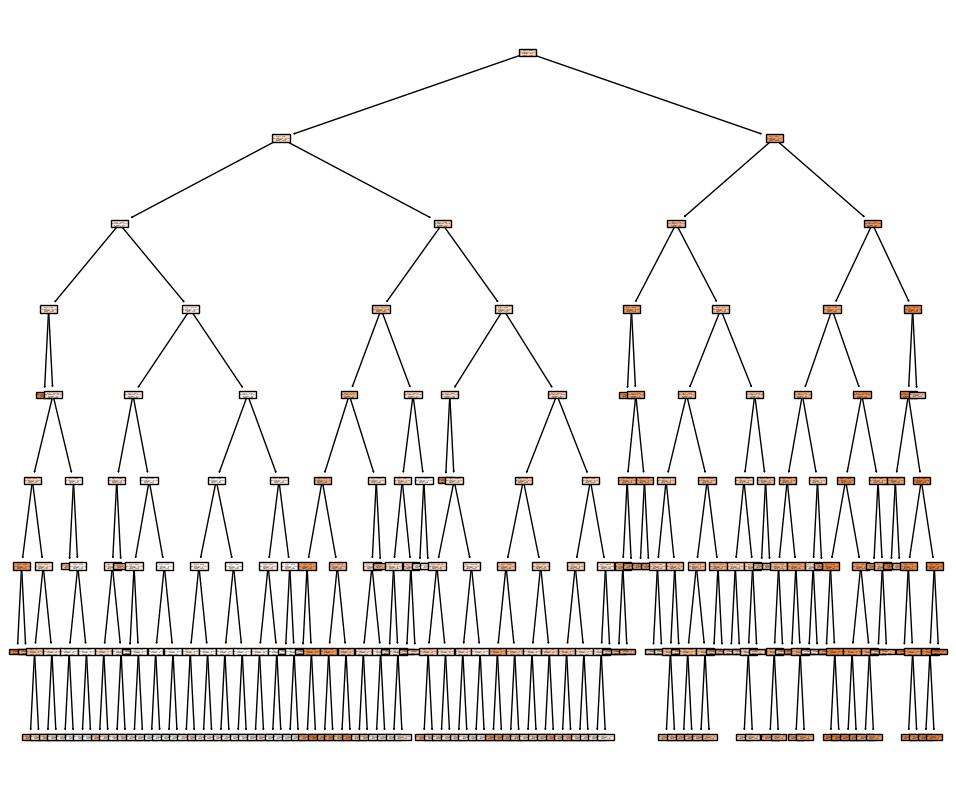

In [27]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(final_model,filled=True)

In [28]:
y_pred=model.predict(x_test)

In [29]:
r2_score(y_test,y_pred)

0.6230941054712211